In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: BMI is Body Mass Index is a ratio of weight and height. It can be defined as the weight in kilograms, divided by the square of the height in metres. This ratio is used to classify whether a person is underweight, overweight or obese.

children: Number of children covered by health insurance.

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

1
df=pd.read_csv("insurance.csv")

# Problem statement

There is a insurance company and this company wants to create system that can predict what is the medical insurance cost of a person.

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
df2=df.drop_duplicates()  ## use this function for drop duplicates value

In [11]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
 df2.shape

(1337, 7)

In [13]:
df2.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Analyse Age colum 

In [14]:
df2["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [15]:
df2.age.value_counts()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

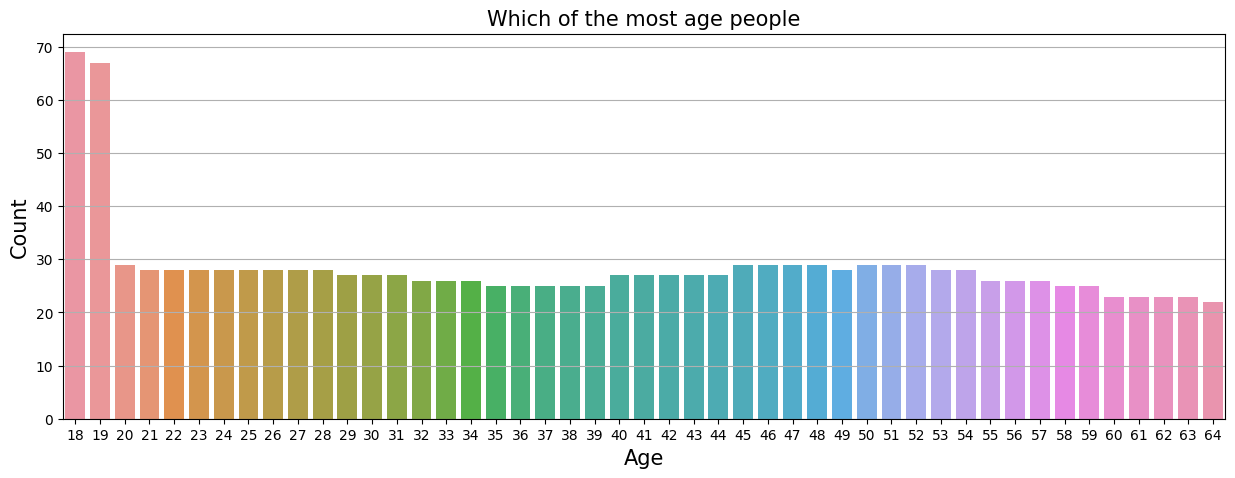

In [90]:
# que = Which age group has more people ?

plt.figure(figsize=(15,5))
sns.countplot(x="age",data=df2)
plt.title("Which of the most age people",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

<Axes: xlabel='age', ylabel='Density'>

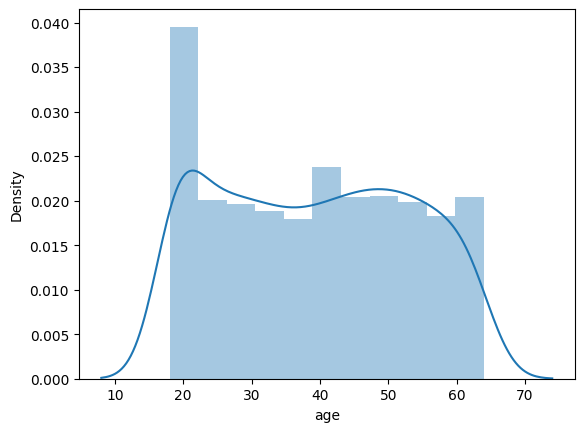

In [17]:
## distplot for Age column

sns.distplot(df2["age"])

(10.0, 70.0)

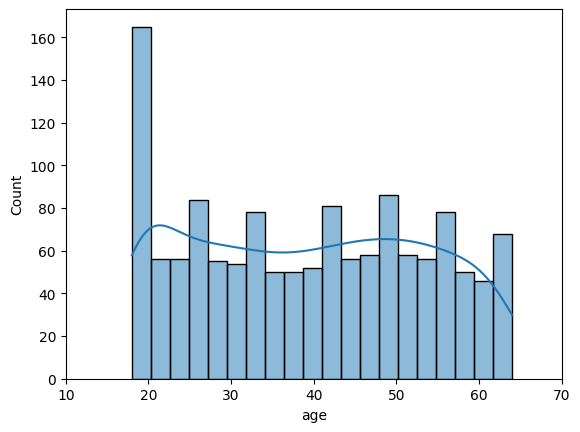

In [18]:
## Histogram for Age column

sns.histplot(df2["age"], kde = True, bins = 20)
plt.xlim([10,70])

Observation:

        * People of 18 and 19 age are the most

# Analyse sex colum

In [19]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [20]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

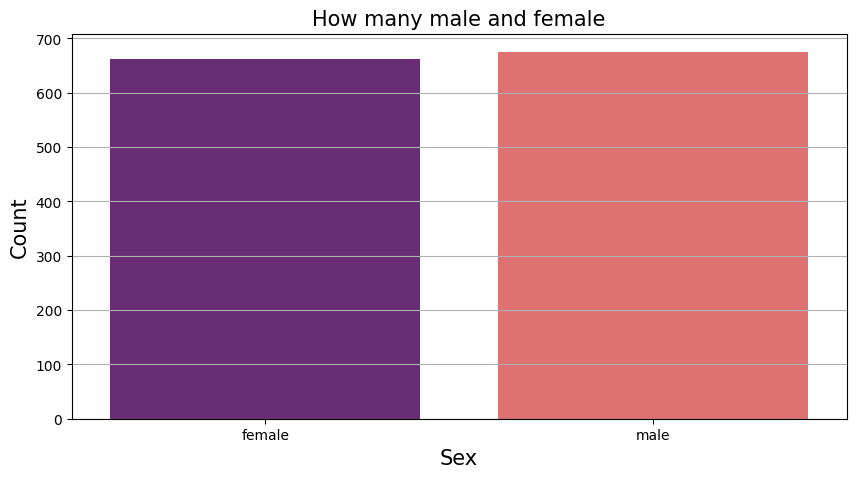

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x="sex",data=df2,palette="magma")
plt.title("How many male and female",fontsize=15)
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

<Axes: ylabel='count'>

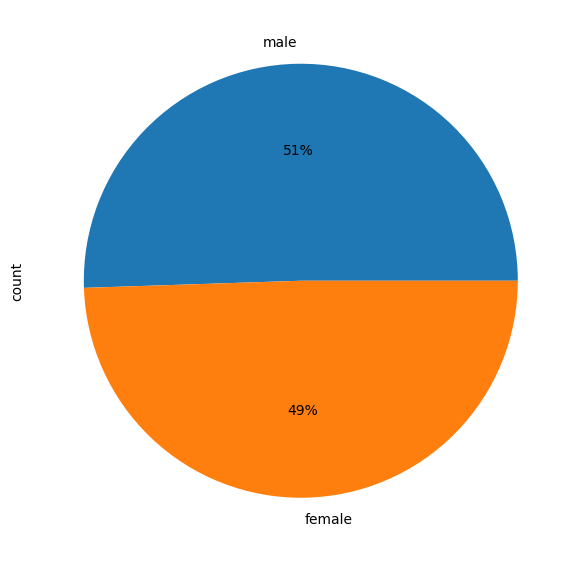

In [22]:
plt.figure(figsize=(7,10))
df["sex"].value_counts().plot.pie(autopct="%.0f%%")

Observation:

       * There is more male than female
       * The percentage of male is 51
       * The percentage of frmale is 49

# Compare colum age and sex

# Compare relation between in which age highest male and female

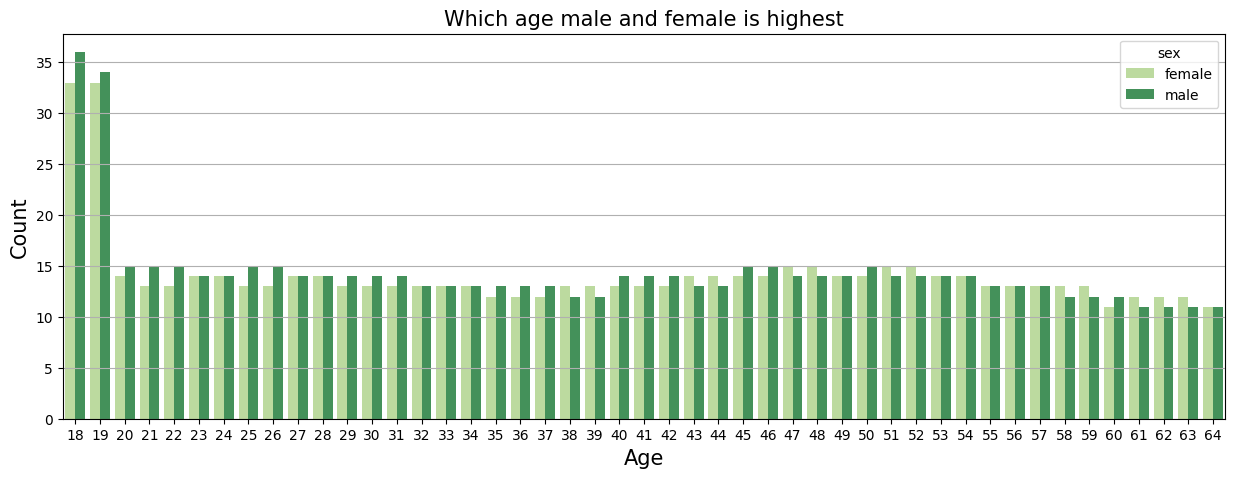

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x="age",hue="sex",data=df2,palette="YlGn")
plt.title("Which age male and female is highest",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

Observation:

        * Most of male and female are 18 to 19 years old.

# Analyse bmi colum

In [24]:
df["bmi"].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [25]:
df.bmi.value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [26]:
df["bmi"].min(),df["bmi"].max()

(15.96, 53.13)

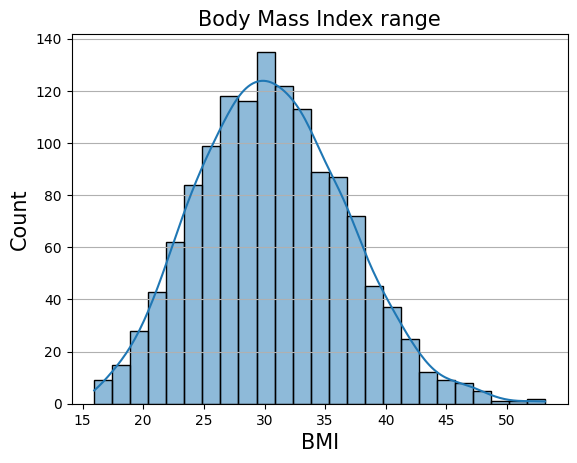

In [27]:
## Using histogram for bmi colum

sns.histplot(df2["bmi"],kde=True)
plt.title("Body Mass Index range",fontsize=15)
plt.xlabel("BMI",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

Text(0, 0.5, 'Count')

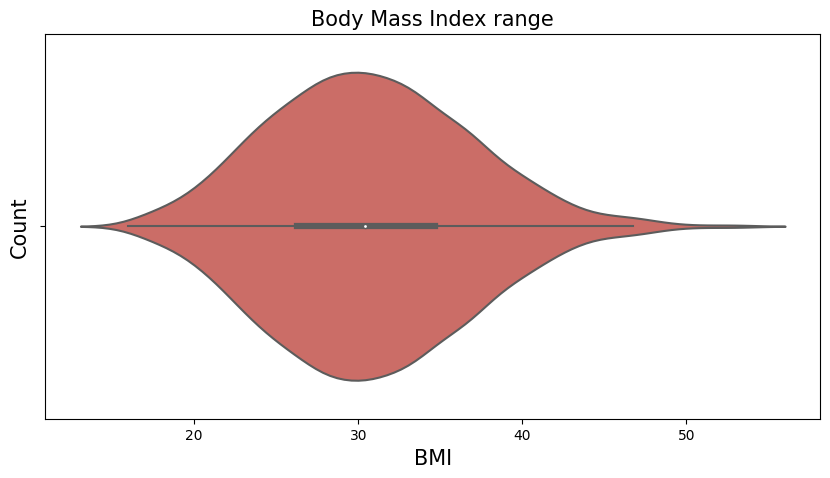

In [28]:
## Using Violinplot for bmi colum

plt.figure(figsize=(10,5))
sns.violinplot(x="bmi",data=df2,palette = "hls")
plt.title("Body Mass Index range",fontsize=15)
plt.xlabel("BMI",fontsize=15)
plt.ylabel("Count",fontsize=15)

Text(0, 0.5, 'Count')

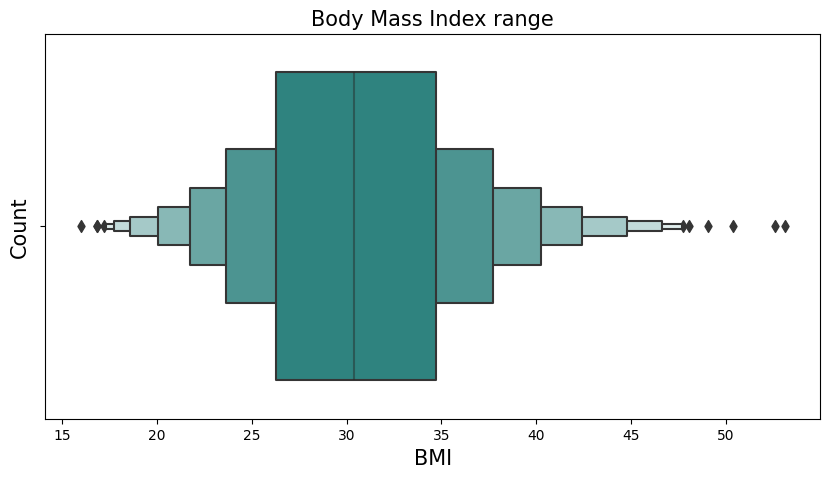

In [29]:
## Using Boxenplot for bmi colum

plt.figure(figsize=(10,5))
sns.boxenplot(x="bmi",data=df2,palette = "viridis")
plt.title("Body Mass Index range",fontsize=15)
plt.xlabel("BMI",fontsize=15)
plt.ylabel("Count",fontsize=15)

Observation:

        * Most of the Body Mass Index (bmi) in between 25 to 35

# Compare colum bmi , sex and age

<Axes: xlabel='age', ylabel='bmi'>

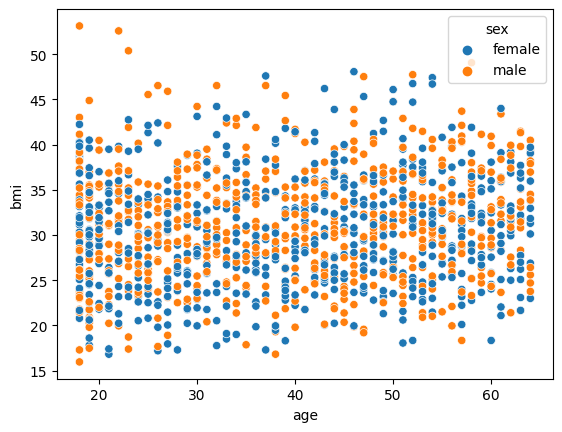

In [30]:
sns.scatterplot(x="age",y="bmi",hue="sex",data=df2)

# Analyse children colum

In [31]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [32]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

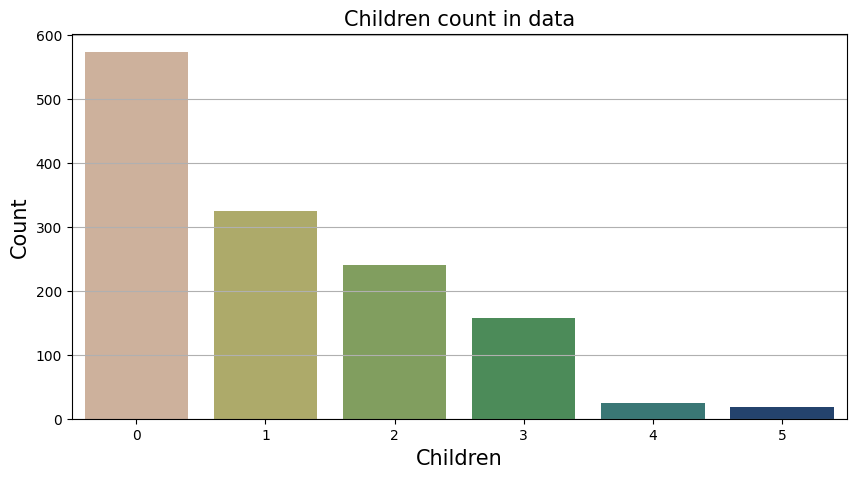

In [33]:
## countplot for childern colum

plt.figure(figsize=(10,5))
sns.countplot(x="children",data=df2,palette="gist_earth_r")
plt.title("Children count in data",fontsize=15)
plt.xlabel("Children",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

<Axes: ylabel='count'>

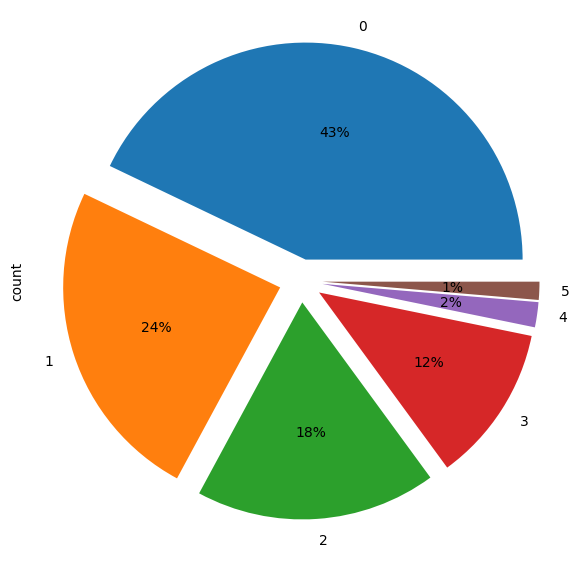

In [34]:
## piechart for childern colum

plt.figure(figsize=(7,15))
df["children"].value_counts().plot.pie(autopct="%.0f%%",explode=(.1,.1,.1,.1,.1,.1))

Text(0, 0.5, 'Count')

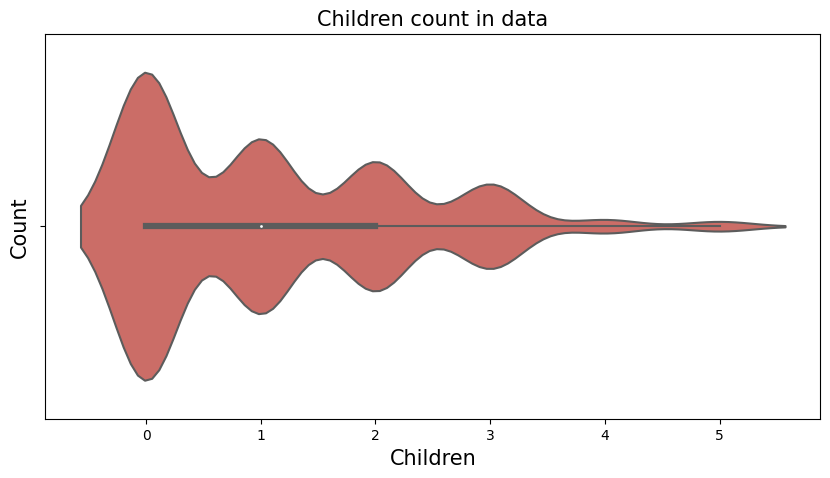

In [35]:
## violinplot for childern colum

plt.figure(figsize=(10,5))
sns.violinplot(x="children",data=df2,palette = "hls")
plt.title("Children count in data",fontsize=15)
plt.xlabel("Children",fontsize=15)
plt.ylabel("Count",fontsize=15)

Text(0, 0.5, 'Count')

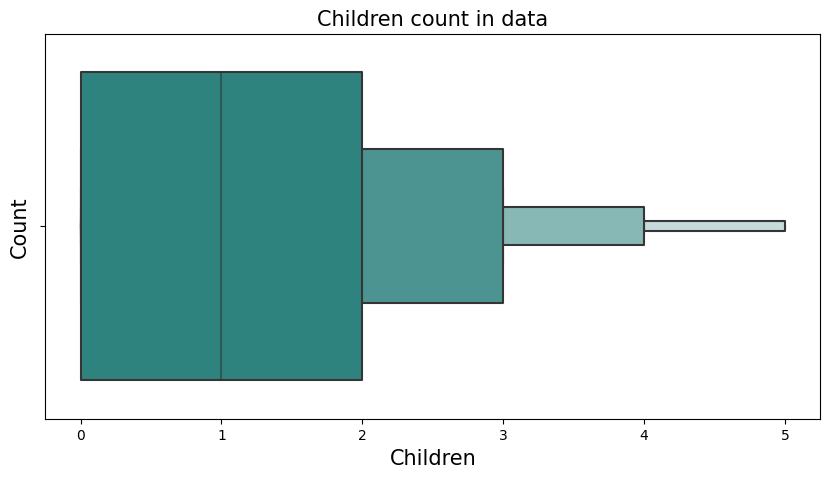

In [36]:
## boxenplot for childern colum

plt.figure(figsize=(10,5))
sns.boxenplot(x="children",data=df2,palette = "viridis")
plt.title("Children count in data",fontsize=15)
plt.xlabel("Children",fontsize=15)
plt.ylabel("Count",fontsize=15)

Observation:

        * Most of the  0 to 2 childrens covered by health insurance.
        * 42%  1 or 2 childrens covered by health insurance.
        * 43% childrens are not covered in health insurance.

# Compare colum children and sex

# Compare relation between Which children is male and female

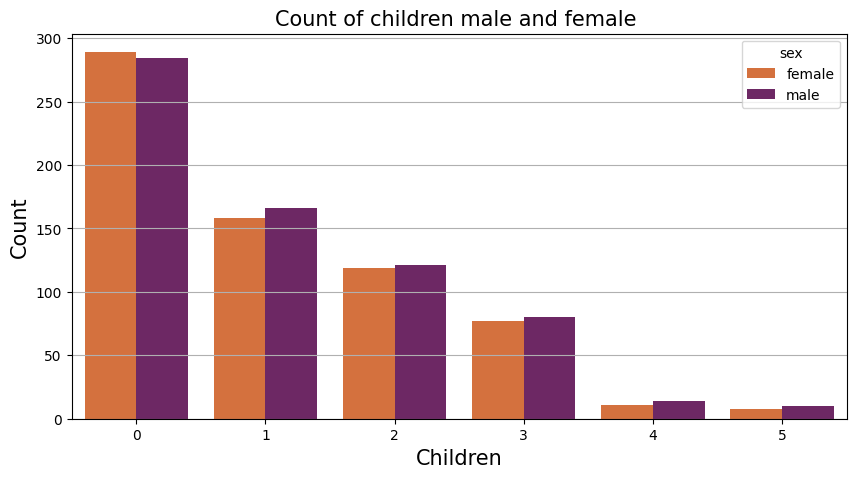

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(x="children",hue="sex",data=df2,palette="inferno_r")
plt.title("Count of children male and female ",fontsize=15)
plt.xlabel("Children",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis='y')

Observation:

    * There are  0 male and female children who  covered by health insurance count is more than 250.
    * There are  at least 1 male and female children who  covered by health insurance count is more than 150.
    * There are  2 male and female children who  covered by health insurance count is more than 100.

# Analyse smoker colum

In [38]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [39]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

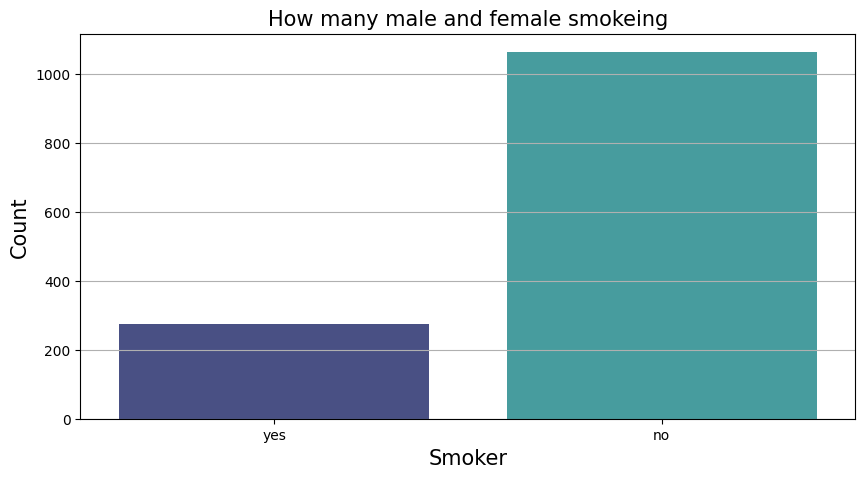

In [40]:
## countplot for smoker colum

plt.figure(figsize=(10,5))
sns.countplot(x="smoker",data=df2,palette="mako")
plt.title("How many male and female smokeing",fontsize=15)
plt.xlabel("Smoker",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

<Axes: ylabel='count'>

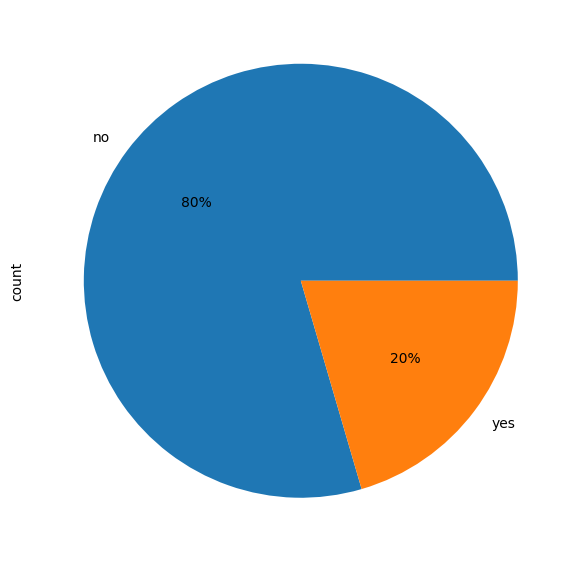

In [41]:
## piechart for smoker colum

plt.figure(figsize=(7,15))
df["smoker"].value_counts().plot.pie(autopct="%.0f%%")

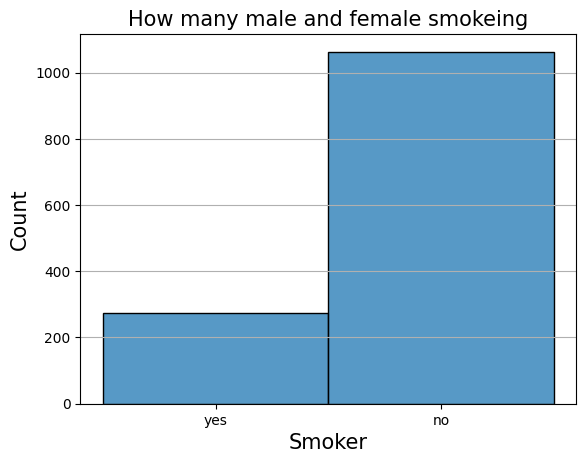

In [42]:
## histplot for smoker colum

sns.histplot(x="smoker",data=df2)
plt.title("How many male and female smokeing",fontsize=15)
plt.xlabel("Smoker",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

Observation:

         * From above graph show.
         * Most of the people is not smoker.
         * 80%  people is not smoker.
         * 20% people is smoker.

# Compare colum smoker and children

# Compare relation between Which children is male and female

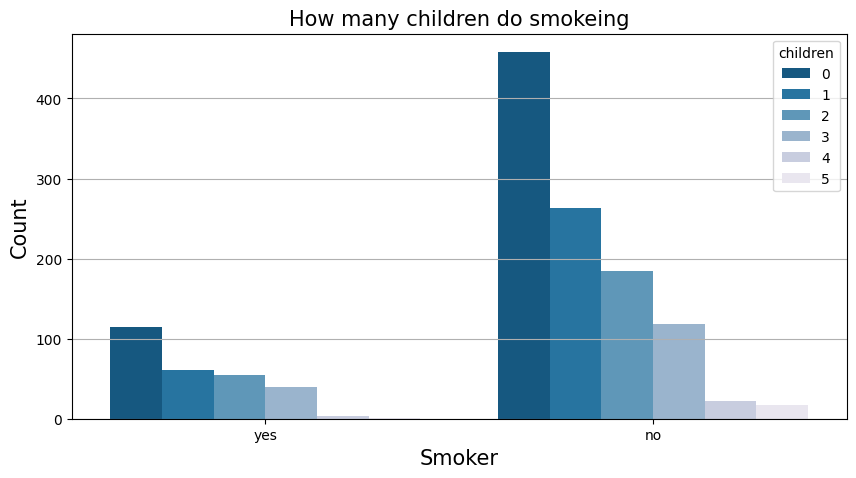

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x="smoker",hue="children",data=df2,palette="PuBu_r")
plt.title("How many children do smokeing",fontsize=15)
plt.xlabel("Smoker",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

Observation:

         * Most of the Children who are covered in insurance  do not smoke .

# Compare colum smoker and sex

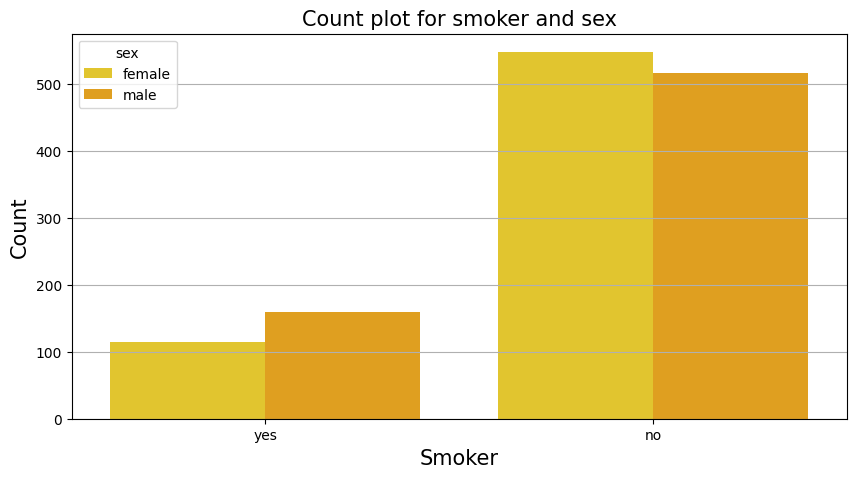

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x="smoker",hue="sex",data=df2,palette="Wistia")
plt.title("Count plot for smoker and sex",fontsize=15)
plt.xlabel("Smoker",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

Observation:

       * More than 500 male and female are not smoker.
       * More than 100 male and female are smoker.

# Analyse region colum

In [45]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [46]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

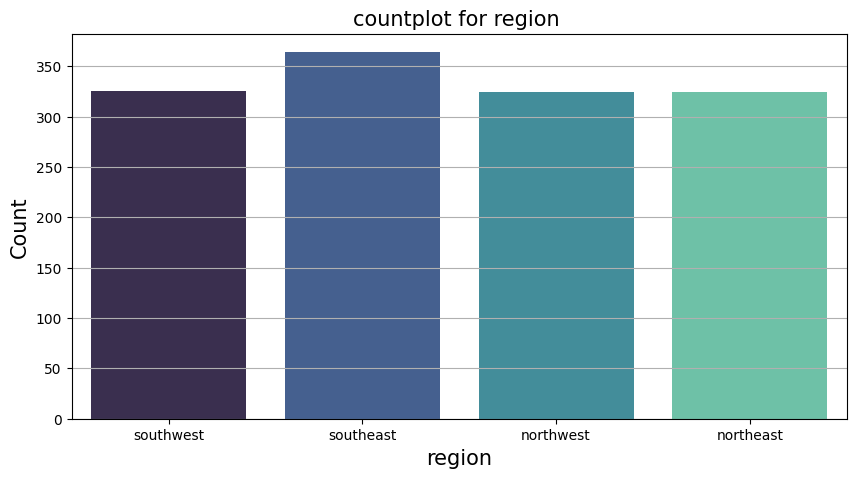

In [47]:
## countplot for region colum

plt.figure(figsize=(10,5))
sns.countplot(x="region",data=df2,palette="mako")
plt.title("countplot for region ",fontsize=15)
plt.xlabel("region",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

<Axes: ylabel='count'>

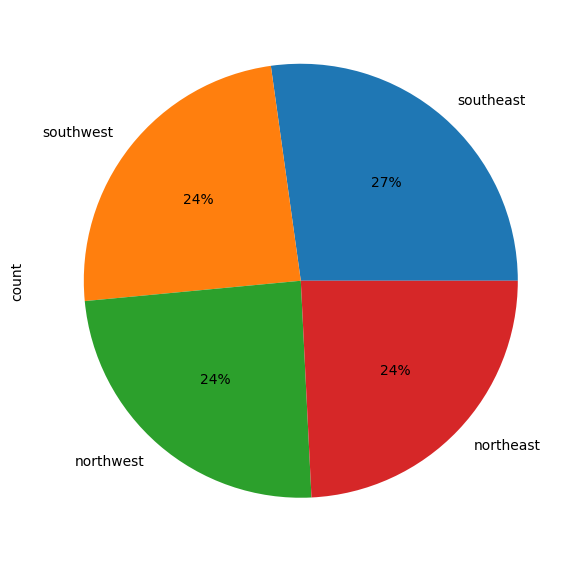

In [48]:
## piechart for region colum

plt.figure(figsize=(7,15))
df["region"].value_counts().plot.pie(autopct="%.0f%%")

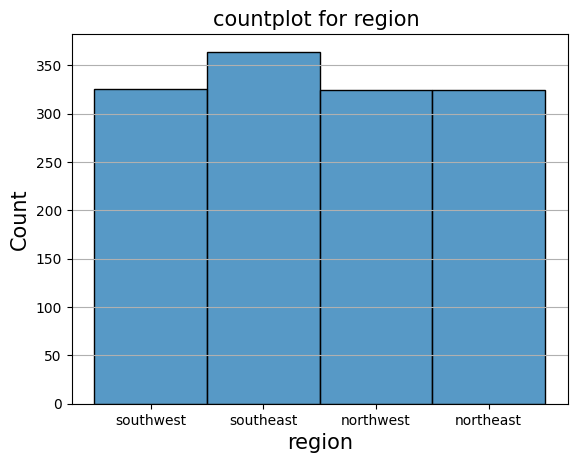

In [49]:
## histplot for region colum

sns.histplot(x="region",data=df2)
plt.title("countplot for region ",fontsize=15)
plt.xlabel("region",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

Observation:

       * Most of health insurance holder came from southeast of us.
       * 27% health insurance holder came from southeast of us.
       * 24% health insurance holder came from southwest of us.
       * 24% health insurance holder came from northwest of us.
       * 24% health insurance holder came from northeast of us.

# Compare colum region and smoker

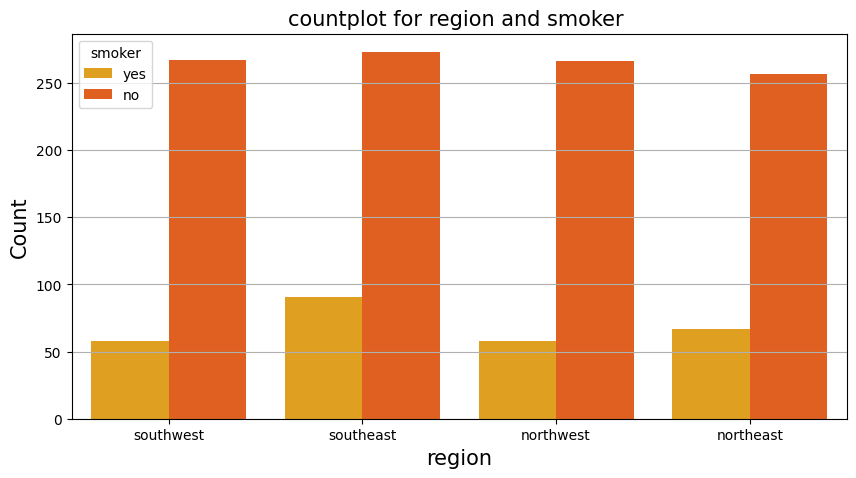

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x="region",hue="smoker",data=df2,palette="autumn_r")
plt.title("countplot for region and smoker ",fontsize=15)
plt.xlabel("region",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

Observation:

    * There are over 250 people in all the four regions who do not smoke.
    * There are over 50 people in all the four regions who are smoke.

# Compare colum region and children

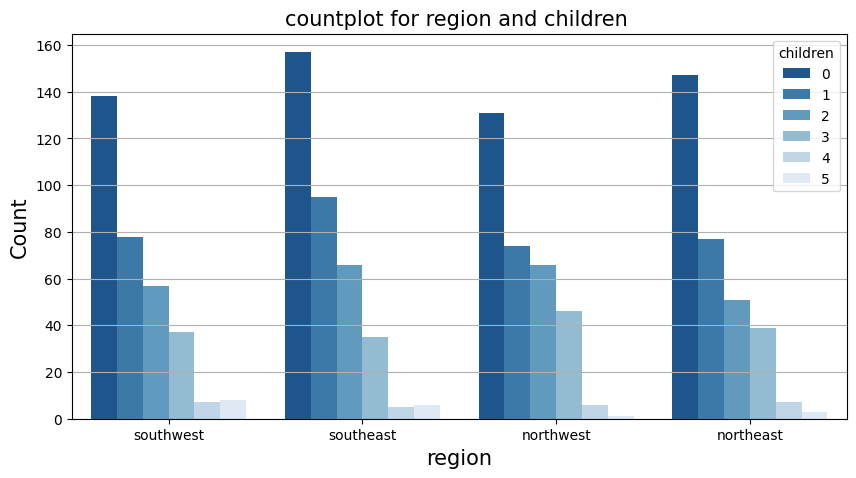

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x="region",hue="children",data=df2,palette="Blues_r")
plt.title("countplot for region and children ",fontsize=15)
plt.xlabel("region",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

Observation:

    * Southest is the region where most of children corved by health insurance.

# Compare colum region and sex

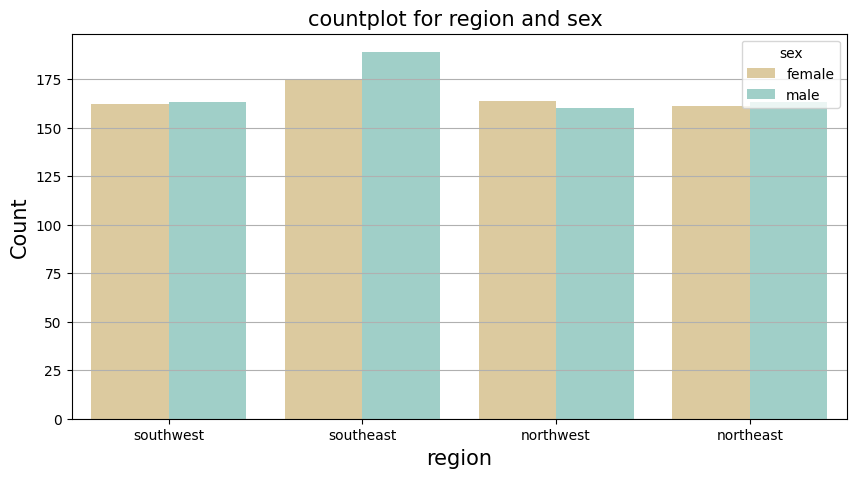

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x="region",hue="sex",data=df2,palette="BrBG")
plt.title("countplot for region and sex ",fontsize=15)
plt.xlabel("region",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

Observation:

       * Most of the male and female come from SouthEast region.
       * Equal numbers of male and female come from the other three regions.

In [53]:
df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [54]:
df.charges.value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

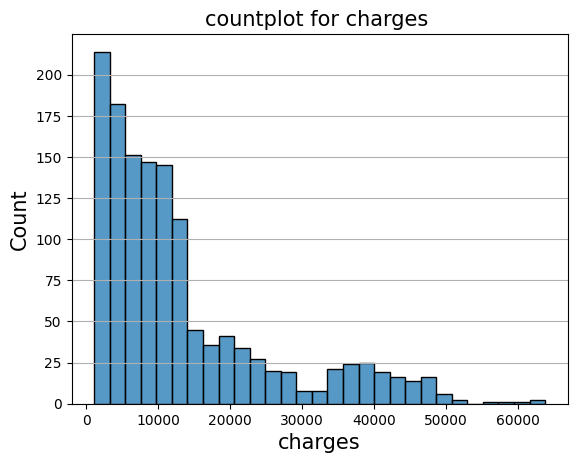

In [55]:
sns.histplot(x="charges",data=df2)
plt.title("countplot for charges ",fontsize=15)
plt.xlabel("charges",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid(axis="y")

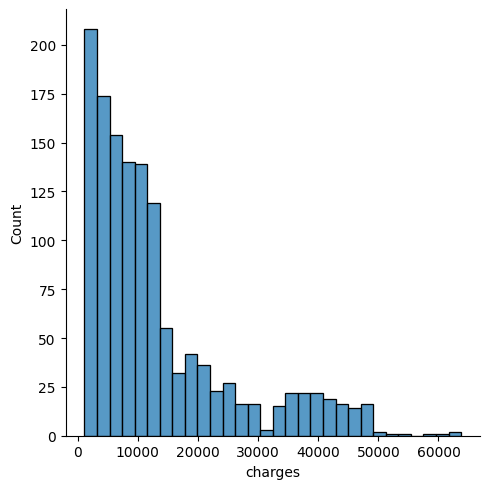

In [56]:
sns.displot(df["charges"])

Observation: 
            
            * Most of the charge in between 1000 to 15000

# Compare colum charges and age

<Axes: xlabel='age', ylabel='charges'>

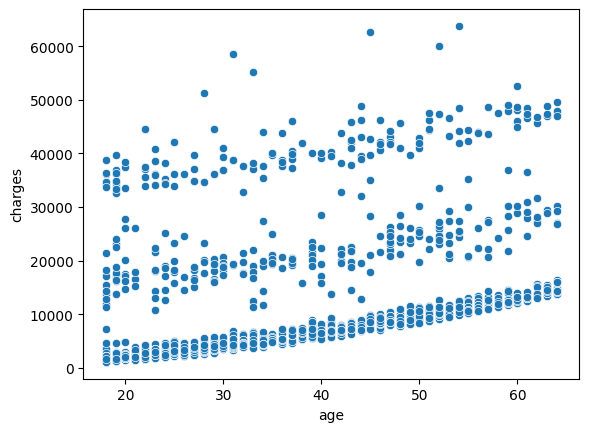

In [57]:
sns.scatterplot(x="age",y="charges",data=df2)

Observation:

      * The cost of insurance for children between the age of 0 to 20 years falls between 1000 to 5000.

# Compare charges and age colum with categorical colum sex,smoker and region

# Compare colum charges , age and sex

<Axes: xlabel='age', ylabel='charges'>

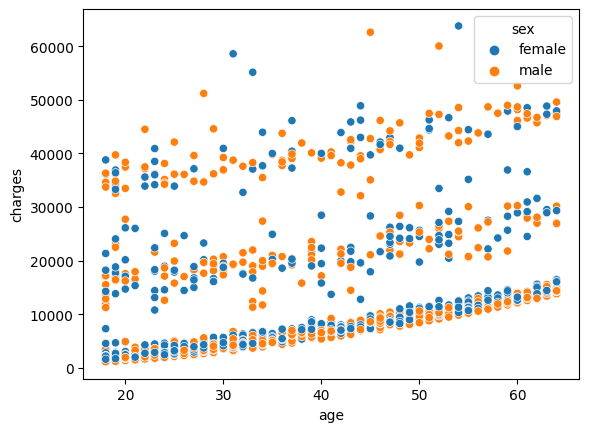

In [58]:
sns.scatterplot(x="age",y="charges",hue="sex",data=df2)

#  Compare colum charges , age and smoker

<Axes: xlabel='age', ylabel='charges'>

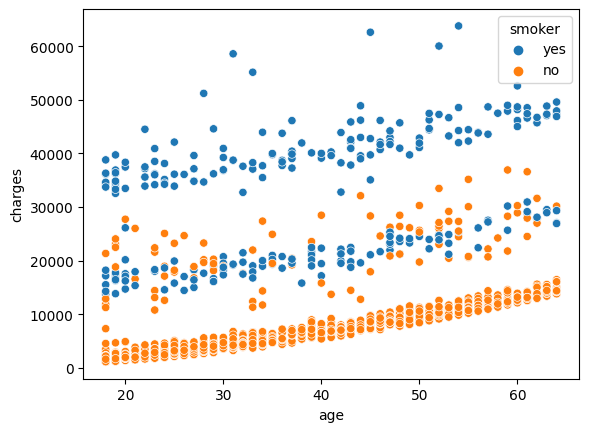

In [59]:
sns.scatterplot(x="age",y="charges",hue="smoker",data=df2)

Observation:

       * Those who smoke the most, age vise their insurance price falls between 30000 to 60000.
       * For those who do not smoke, the price of insurance comes between 1000 to 10000.

# Compare colum charges , age and region

<Axes: xlabel='age', ylabel='charges'>

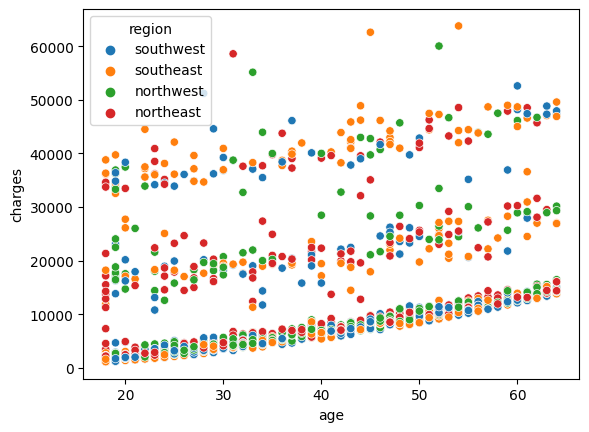

In [60]:
sns.scatterplot(x="age",y="charges",hue="region",data=df2)

# Compare colum charges and bmi

<Axes: xlabel='bmi', ylabel='charges'>

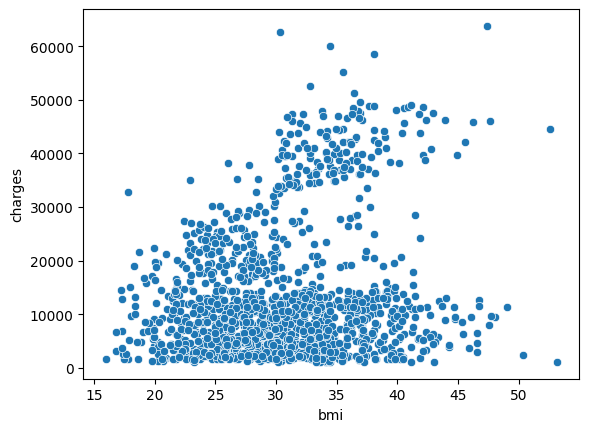

In [61]:
sns.scatterplot(x="bmi",y="charges",data=df2)

Observation:

    * Whose weight is in the range of 25 to 35 it means they are underweight. The price of their insurance comes between 1000 to 15000.

# Compare charges and bmi colum with categorical colum sex,smoker and region

# Compare colum charges , bmi and sex

<Axes: xlabel='bmi', ylabel='charges'>

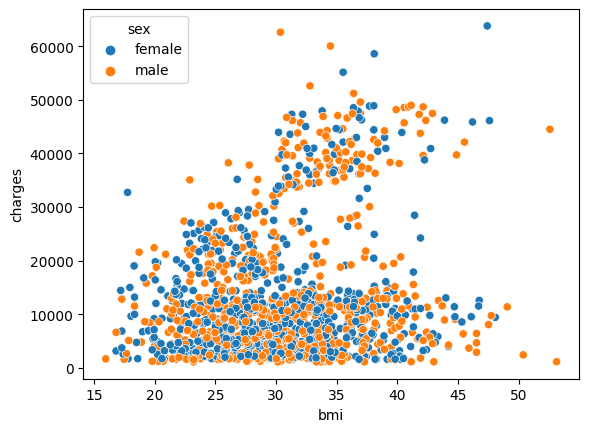

In [62]:
sns.scatterplot(x="bmi",y="charges",hue="sex",data=df2)

Observation:

* most of male and female the weight is in the range of 25 to 35 it means they are underweight. The price of their insurance comes between 1000 to 15000.
*  male and female the weight is in the range of 33 to 50 it means they are overweight. The price of their insurance comes between 30000 to 60000.

# Compare colum charges , bmi and smoker

<Axes: xlabel='bmi', ylabel='charges'>

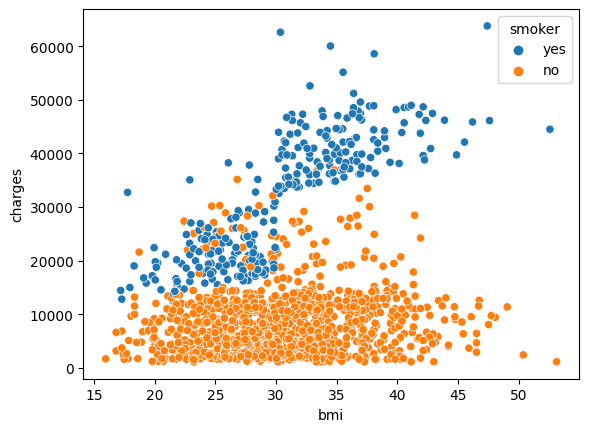

In [63]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=df2)

Observation: 
            
        * People who do not smoke and their weight range is between 25 to 35 it means they are underweight.The price of their insurance comes from 1000 to 10000.
        * People who smoke and their weight range is between 18 to 50.The price of their insurance comes from 15000 to 60000.

# Compare colum charges , bmi and region

<Axes: xlabel='bmi', ylabel='charges'>

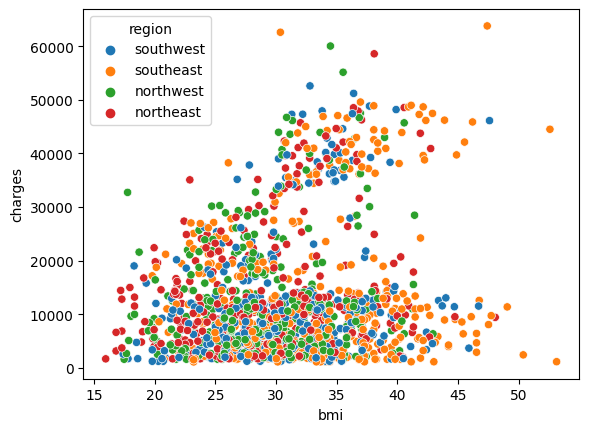

In [64]:
sns.scatterplot(x="bmi",y="charges",hue="region",data=df2)

# Compare colum charges and children

<Axes: xlabel='children', ylabel='charges'>

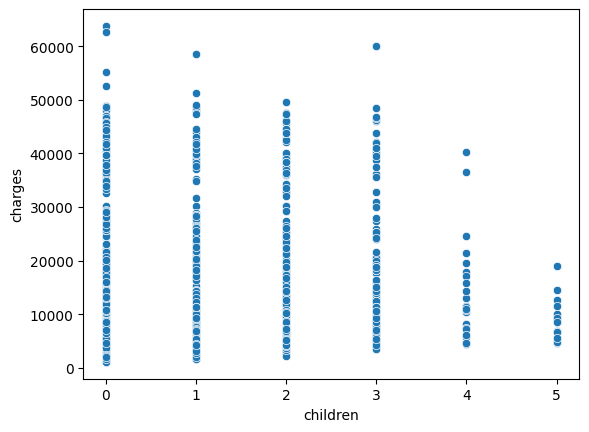

In [65]:
sns.scatterplot(x="children",y="charges",data=df2)

# Compare charges and children colum with categorical colum sex,smoker and region

# Compare colum charges , children and sex

<Axes: xlabel='children', ylabel='charges'>

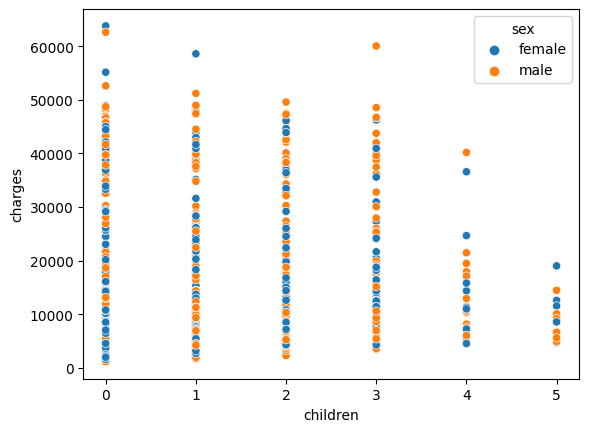

In [66]:
sns.scatterplot(x="children",y="charges",hue="sex",data=df2)

# Compare colum charges , children and smoker

<Axes: xlabel='children', ylabel='charges'>

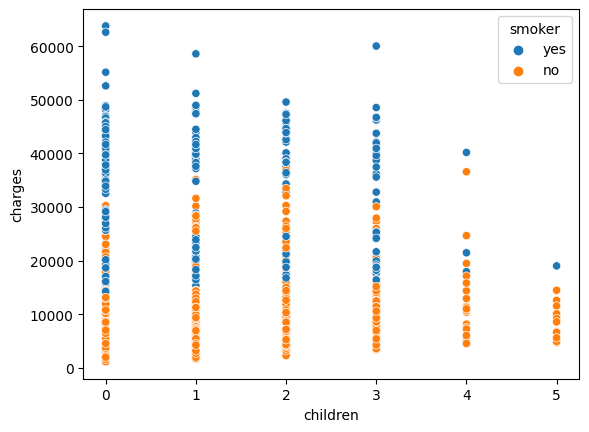

In [67]:
sns.scatterplot(x="children",y="charges",hue="smoker",data=df2)

# Compare colum charges , children and region

<Axes: xlabel='children', ylabel='charges'>

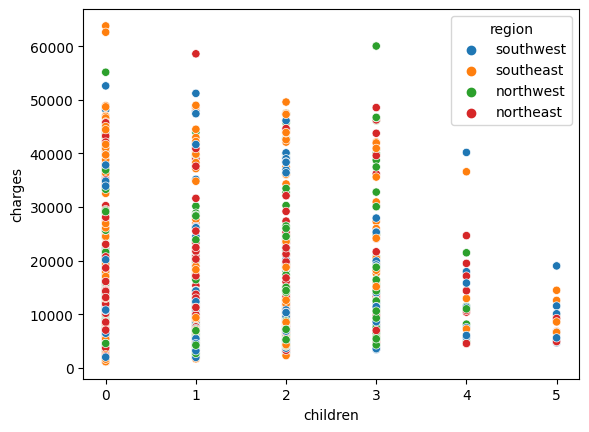

In [68]:
sns.scatterplot(x="children",y="charges",hue="region",data=df2)

# Finding the correlation of data

In [69]:
A = df2.select_dtypes(include='number')
A

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [70]:
correlation=A.corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<Axes: >

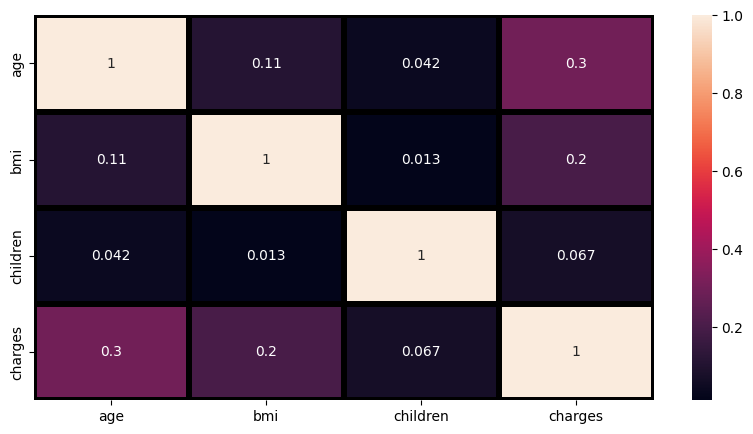

In [71]:
plt.figure(figsize=(10,5))
sns.heatmap(A.corr(),annot=True,linewidths=4,linecolor="k")

# Feature Engineering

 * We use here one hot encoding.
 * Because there is multiple independent colum with categorical value.

In [72]:
## Convert categorical value into numerical value

dataset = pd.get_dummies(df2,dtype=int)

In [73]:
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [74]:
X = dataset.drop(columns=["charges",'sex_female','smoker_yes','region_northeast'], axis=1)
y = dataset["charges"]

# Spliting data into train and test set

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [102]:
X_train.shape

(1069, 8)

In [103]:
y_train.shape

(1069,)

In [104]:
X_test.shape

(268, 8)

In [105]:
y_test.shape

(268,)

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
reg=LinearRegression()

In [108]:
reg.fit(X_train,y_train)

LinearRegression()

In [113]:
reg.predict(X_test)

array([27310.13246147, 31874.375918  ,  1772.58604182, 11672.70525832,
        6369.58383052, 12728.53859948,  8240.28923199, 11181.79333017,
       12365.33010095,  2121.46693317, 31719.81384571,  2207.99927156,
        9312.96758174,  5493.14300928, 29927.18485085,  9928.95635317,
        5421.05698383, 13744.71035372,  7679.49769252,  5889.78408538,
       -1236.11091331, 15804.49065819, 32965.39339172, 33770.70069303,
       10382.11428828,  2027.01746697, 13121.62679313,  5807.96273679,
       25076.42694083,  9939.17018091,  2151.01049456,  2249.06069688,
       25842.4650258 ,  9085.76778468, 32303.77020093,  3711.13365441,
       33345.81912536,  6923.50493996, 10837.37111815,   337.12306688,
       10708.19455445, 12261.29195471, 26920.51982611,  1799.33803538,
       35613.7829867 ,  2691.62265446, 32125.68706326,  2666.78388552,
       11187.00809774, 23867.92339842,  6692.97075569, 36753.62467385,
       34316.40307165, 35423.60401401,  8758.76927965, 37169.91510944,
      

In [110]:
from sklearn.metrics import r2_score

In [111]:
r2_score(y_test,reg.predict(X_test))*100

76.70815205141135